<a href="https://colab.research.google.com/github/abhiramoggu/statistics-analysis/blob/main/STATFinalQ1v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

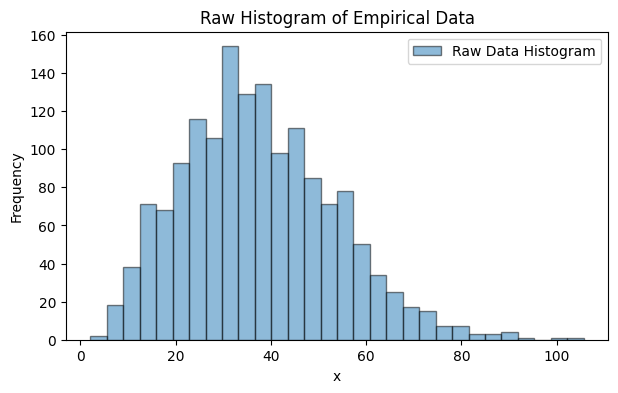

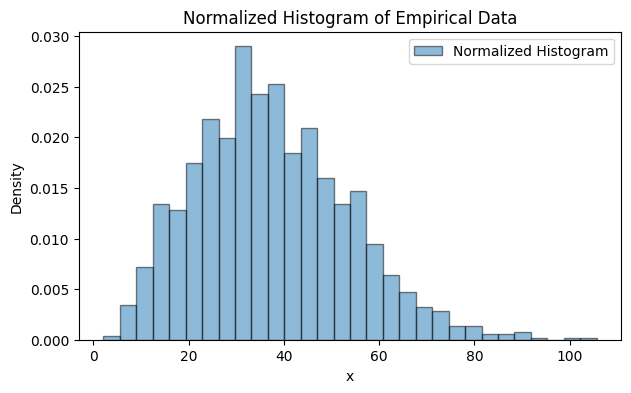

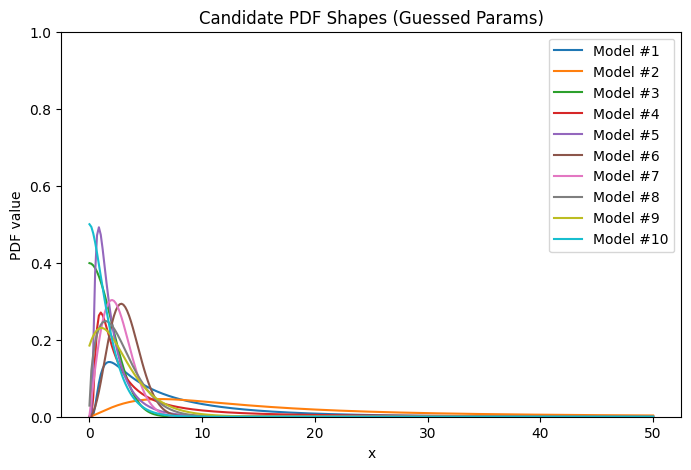

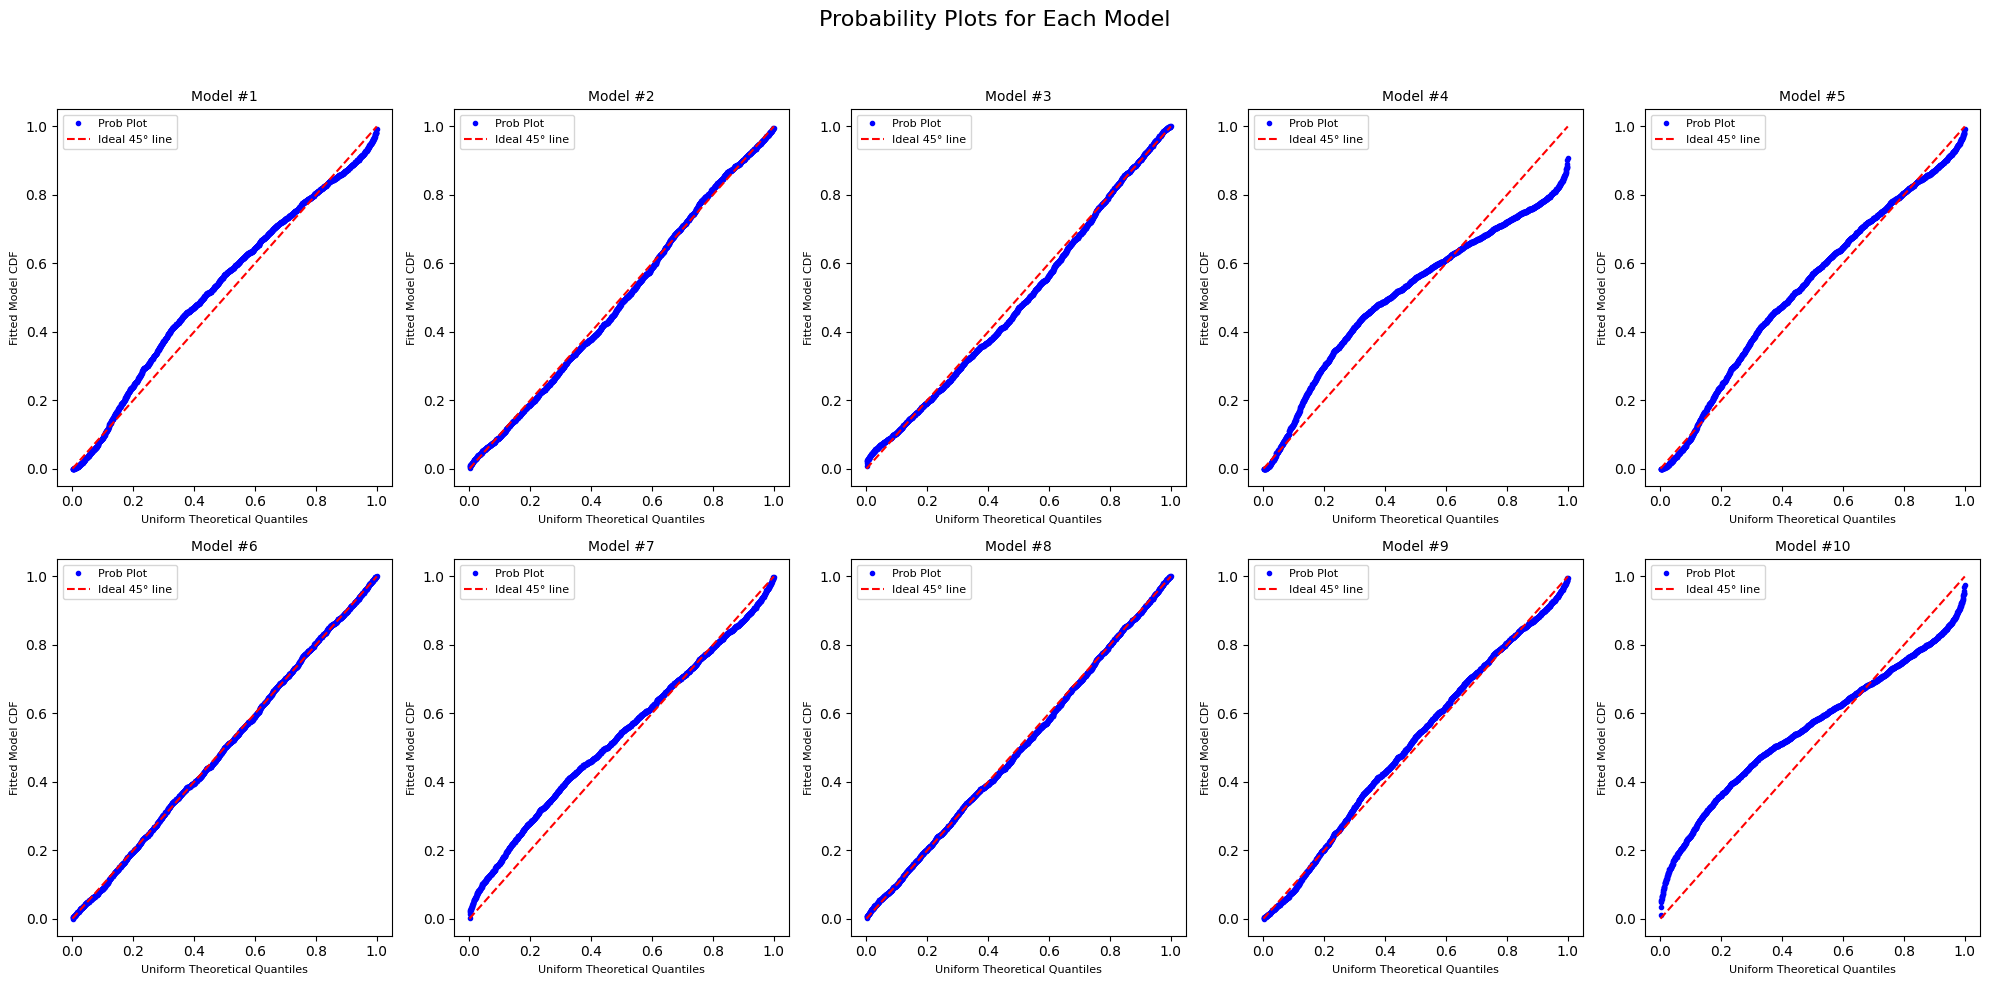

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df


=== Probability Plots for Each Model ===


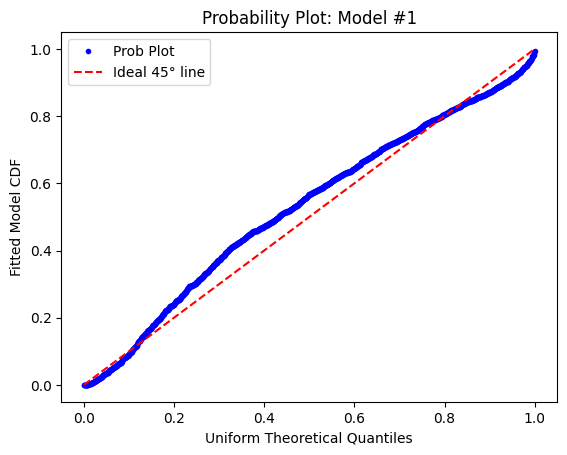

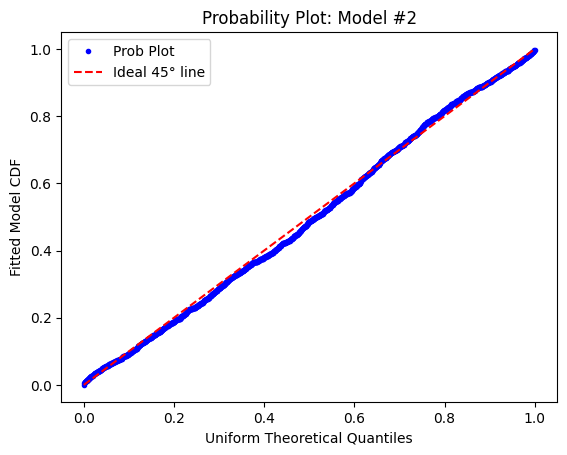

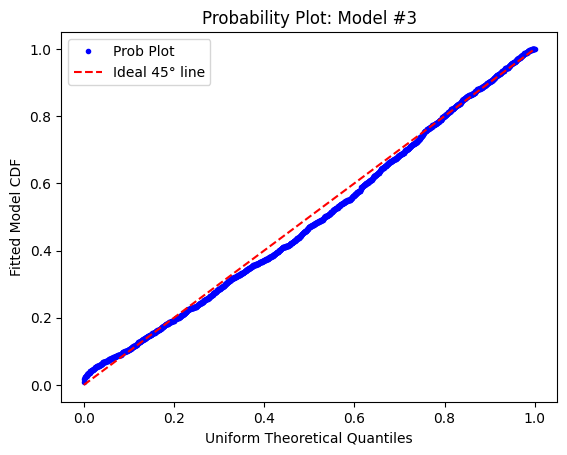

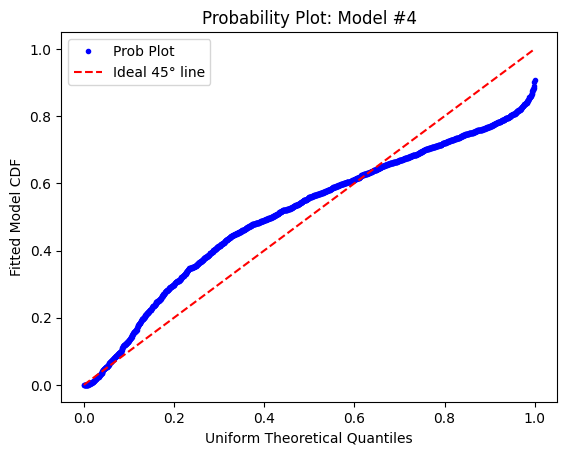

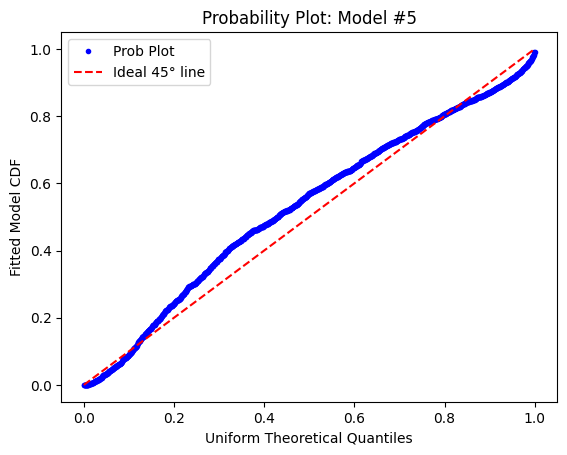

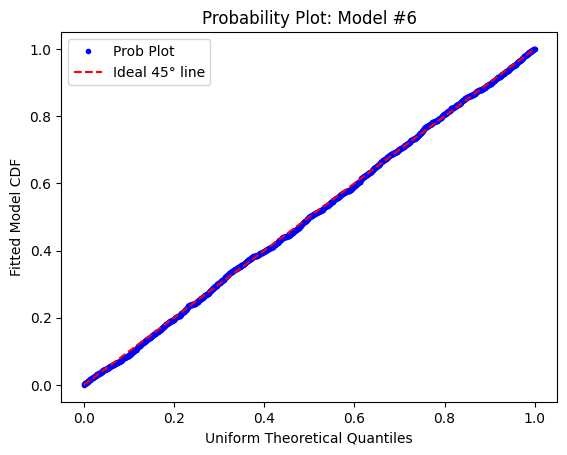

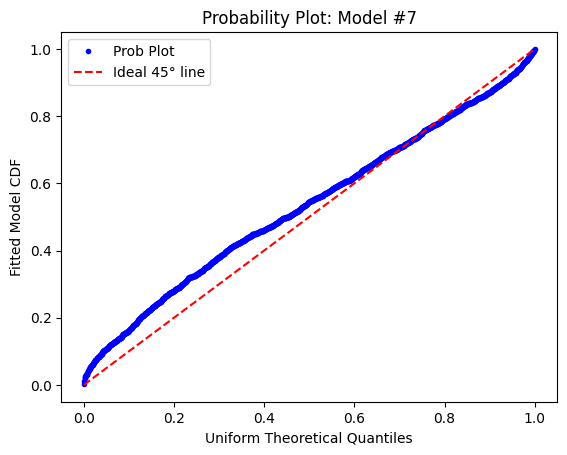

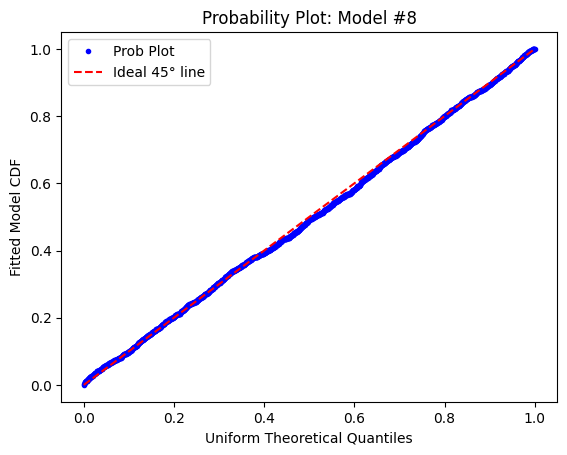

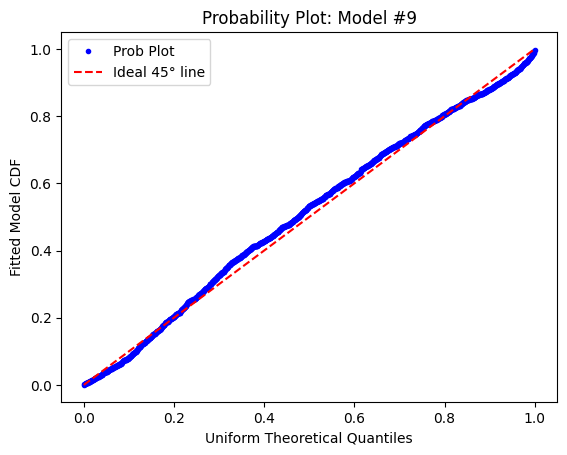

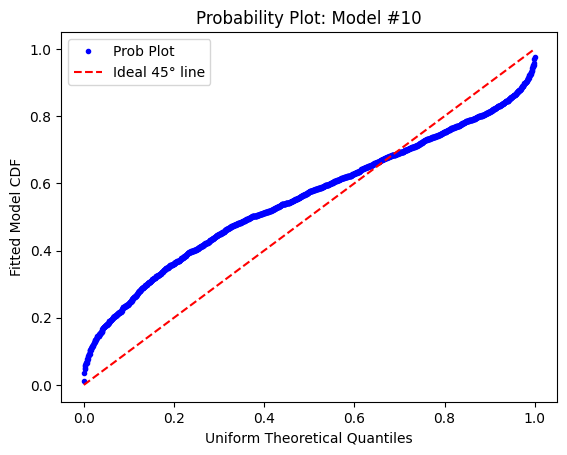


=== KS TEST RESULTS (with p-value) ===
Model #1: KS stat=0.0820, p-value=0.0000, => REJECT at alpha=0.05
Model #2: KS stat=0.0280, p-value=0.1773, => FAIL TO REJECT at alpha=0.05
Model #3: KS stat=0.0402, p-value=0.0139, => REJECT at alpha=0.05
Model #4: KS stat=0.1490, p-value=0.0000, => REJECT at alpha=0.05
Model #5: KS stat=0.0846, p-value=0.0000, => REJECT at alpha=0.05
Model #6: KS stat=0.0128, p-value=1.0000, => FAIL TO REJECT at alpha=0.05
Model #7: KS stat=0.0854, p-value=0.0000, => REJECT at alpha=0.05
Model #8: KS stat=0.0212, p-value=0.5022, => FAIL TO REJECT at alpha=0.05
Model #9: KS stat=0.0365, p-value=0.0329, => REJECT at alpha=0.05
Model #10: KS stat=0.1653, p-value=0.0000, => REJECT at alpha=0.05

=== AIC/BIC RESULTS (AFTER VISUAL + KS) ===
Model #1: AIC=13011.9021, BIC=13022.5812, logL=-6503.9510
Model #2: AIC=12838.4958, BIC=12854.5144, logL=-6416.2479
Model #3: AIC=12890.7323, BIC=12901.4114, logL=-6443.3661
Model #4: AIC=13657.6820, BIC=13668.3611, logL=-6826.841

In [ ]:
##############################################
# 0. IMPORTS
##############################################
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# For reproducibility in random sampling, bootstrapping, etc.
random.seed(123)
np.random.seed(123)

##############################################
# 1. LOAD DATA + PLOT HISTOGRAMS
##############################################
data_file = "data26002204680.csv"  # your CSV file path
data = []
with open(data_file, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        val = float(row[0])
        data.append(val)
data = np.array(data)
n = len(data)

# 1A. RAW HISTOGRAM
plt.figure(figsize=(7,4))
plt.hist(data, bins=30, alpha=0.5, edgecolor='k', label="Raw Data Histogram")
plt.title("Raw Histogram of Empirical Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 1B. NORMALIZED HISTOGRAM (counts / total => a PDF-like shape)
plt.figure(figsize=(7,4))
plt.hist(data, bins=30, density=True, alpha=0.5, edgecolor='k', label="Normalized Histogram")
plt.title("Normalized Histogram of Empirical Data")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

##############################################
# 2. DEFINE THE 10 CANDIDATE PDFS
#    We'll also guess some example parameters
#    and overlay them all in one plot to compare shapes.
##############################################

def pdf1(x, alpha, beta):
    if x <= 0 or alpha <= 0 or beta <= 0:
        return 0.0
    denom = 2.0 * alpha * math.sqrt(2.0*math.pi*beta) * (x**1.5)
    exponent = -((x - beta)**2 / (2.0 * (alpha**2) * beta * x))
    return (math.exp(exponent) * (x + beta))/ denom

def pdf2(x, c, k, b):
    if x < 0 or c <= 0 or k <= 0 or b <= 0:
        return 0.0
    numerator = (c*k / (b**(c*k))) * (x**(c*k - 1.0))
    denominator = (1.0 + (x**c)/(b**c))**(k+1.0)
    return numerator / denominator

def pdf3(x, mu, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    coeff = 1.0 / (sigma * math.sqrt(2.0*math.pi))
    term1 = math.exp(-((x - mu)**2)/(2.0*(sigma**2)))
    term2 = math.exp(-((x + mu)**2)/(2.0*(sigma**2)))
    return coeff * (term1 + term2)

def pdf4(x, c, sigma):
    if x <= 0 or c <= 0 or sigma <= 0:
        return 0.0
    return (c / x) * ((x / sigma)**(-c)) * math.exp(-((x / sigma)**(-c)))

def pdf5(x, lam, mu):
    if x <= 0 or lam <= 0 or mu <= 0:
        return 0.0
    coeff = math.sqrt(lam/(2.0*math.pi*(x**3)))
    exponent = - lam*((x - mu)**2)/(2.0*(mu**2)*x)
    return coeff * math.exp(exponent)

def pdf6(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    factor = math.sqrt(2.0/math.pi) * (x**2) / (sigma**3)
    return factor * math.exp(-(x**2)/(2.0*(sigma**2)))

def pdf7(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    return (x/(sigma**2)) * math.exp(-(x**2)/(2.0*(sigma**2)))

def pdf8(x, c, b):
    if x < 0 or c <= 0 or b <= 0:
        return 0.0
    return (c*(x**(c-1.0)) * math.exp(-((x**c)/(b**c))))/ (b**c)

def pdf9(x, lam, mu):
    if x < 0 or lam <= 0 or mu <= 0:
        return 0.0
    expr1 = math.exp(-x*lam)
    expr2 = expr1*mu
    val = math.exp(-x*lam - expr2)
    bracket = lam * (1.0 + (1.0 - expr1)*mu)
    return val * bracket

def pdf10(x, sigma):
    if x < 0 or sigma <= 0:
        return 0.0
    const = ((sigma**2) * (1.0 + x))/(1.0 + sigma)
    exponent = - x*sigma
    return const * math.exp(exponent)

# 2A. Plot all 10 PDF shapes on the same graph (guessed params)
x_plot = np.linspace(0.01, 50, 300)
pdf_labels = [
    ("Model #1", pdf1, (1.0, 5.0)),
    ("Model #2", pdf2, (1.5, 1.5, 10.0)),
    ("Model #3", pdf3, (0.0, 2.0)),
    ("Model #4", pdf4, (1.0, 2.0)),
    ("Model #5", pdf5, (3.0, 2.0)),
    ("Model #6", pdf6, (2.0,)),
    ("Model #7", pdf7, (2.0,)),
    ("Model #8", pdf8, (1.5, 3.0)),
    ("Model #9", pdf9, (0.5, 1.0)),
    ("Model #10", pdf10, (1.0,))
]

plt.figure(figsize=(8,5))
for (label, pdf_f, pars) in pdf_labels:
    yvals = [pdf_f(xx, *pars) for xx in x_plot]
    plt.plot(x_plot, yvals, label=label)
plt.title("Candidate PDF Shapes (Guessed Params)")
plt.xlabel("x")
plt.ylabel("PDF value")
plt.ylim(0, 1)  # adjust if needed
plt.legend()
plt.show()

##############################################
# 3. LOG-LIKELIHOOD / NLL / MLE EXPLANATION:
#    We define negative log-likelihood = - sum(log(pdf))
#    Minimizing NLL => maximizing log-likelihood
##############################################

##############################################
# 4 + 5. FIT MODELS (MLE) + Probability Plots
##############################################
# (We'll define nll + fit for each, then do prob plots.)
##############################################

def nll_1(params, data_array):
    alpha, beta = params
    if alpha <= 0 or beta <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf1(x, alpha, beta)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf1(data_array):
    init = [1.0, 2.0]
    res = minimize(lambda p: nll_1(p, data_array), init)
    return res.x, res.fun

# Repeat similarly for pdf2..pdf10:

def nll_2(params, data_array):
    c_, k_, b_ = params
    if c_ <= 0 or k_ <= 0 or b_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf2(x, c_, k_, b_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf2(data_array):
    init = [1.0, 1.5, 1000]
    res = minimize(lambda p: nll_2(p, data_array), init)
    return res.x, res.fun

# ... same pattern for the rest:

def nll_3(params, data_array):
    mu_, sigma_ = params
    if sigma_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf3(x, mu_, sigma_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf3(data_array):
    init = [3.0, 9.0]
    res = minimize(lambda p: nll_3(p, data_array), init)
    return res.x, res.fun

def nll_4(params, data_array):
    c_, sigma_ = params
    if c_ <= 0 or sigma_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf4(x, c_, sigma_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf4(data_array):
    init = [4.0, 9.0]
    res = minimize(lambda p: nll_4(p, data_array), init)
    return res.x, res.fun

def nll_5(params, data_array):
    lam_, mu_ = params
    if lam_ <= 0 or mu_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf5(x, lam_, mu_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf5(data_array):
    init = [3.0, 10.0]
    res = minimize(lambda p: nll_5(p, data_array), init)
    return res.x, res.fun

def nll_6(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf6(x, sigma_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf6(data_array):
    init = [4.0]
    res = minimize(lambda p: nll_6(p, data_array), init)
    return res.x, res.fun

def nll_7(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf7(x, sigma_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf7(data_array):
    init = [3.0]
    res = minimize(lambda p: nll_7(p, data_array), init)
    return res.x, res.fun

def nll_8(params, data_array):
    c_, b_ = params
    if c_ <= 0 or b_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf8(x, c_, b_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf8(data_array):
    init = [1.0, 1.0]
    res = minimize(lambda p: nll_8(p, data_array), init)
    return res.x, res.fun

def nll_9(params, data_array):
    lam_, mu_ = params
    if lam_ <= 0 or mu_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf9(x, lam_, mu_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf9(data_array):
    init = [6.0, 3.0]
    res = minimize(lambda p: nll_9(p, data_array), init, options={'maxiter':1000})
    return res.x, res.fun

def nll_10(params, data_array):
    (sigma_,) = params
    if sigma_ <= 0:
        return np.inf
    total = 0.0
    for x in data_array:
        val = pdf10(x, sigma_)
        if val <= 0:
            return np.inf
        total += -math.log(val)
    return total

def fit_pdf10(data_array):
    init = [3.0]
    res = minimize(lambda p: nll_10(p, data_array), init, options={'maxiter':1000})
    return res.x, res.fun

##############################################
# 5. VISUAL ASSESSMENT: Probability Plots
##############################################
# Set up a grid layout for the subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # 2 rows, 5 columns for 10 models
fig.suptitle("Probability Plots for Each Model", fontsize=16)

# Iterate over each model and plot in the corresponding subplot
for i, (mname, params, nll_val, k) in enumerate(all_results):
    # Determine the row and column for the current subplot
    row = i // 5
    col = i % 5

    # Select the correct PDF function
    if mname == "Model #1":  pdf_ = pdf1
    elif mname == "Model #2": pdf_ = pdf2
    elif mname == "Model #3": pdf_ = pdf3
    elif mname == "Model #4": pdf_ = pdf4
    elif mname == "Model #5": pdf_ = pdf5
    elif mname == "Model #6": pdf_ = pdf6
    elif mname == "Model #7": pdf_ = pdf7
    elif mname == "Model #8": pdf_ = pdf8
    elif mname == "Model #9": pdf_ = pdf9
    else:                     pdf_ = pdf10

    # Probability plot logic
    sorted_data = np.sort(data)
    n_ = len(sorted_data)
    model_cdf_vals = [numeric_cdf(pdf_, x_val, params) for x_val in sorted_data]
    uniform_q = [(i + 0.5) / n_ for i in range(n_)]

    # Plot in the corresponding subplot
    axs[row, col].plot(uniform_q, model_cdf_vals, 'bo', markersize=3, label='Prob Plot')
    axs[row, col].plot([0, 1], [0, 1], 'r--', label='Ideal 45° line')
    axs[row, col].set_title(f"{mname}", fontsize=10)
    axs[row, col].set_xlabel("Uniform Theoretical Quantiles", fontsize=8)
    axs[row, col].set_ylabel("Fitted Model CDF", fontsize=8)
    axs[row, col].legend(fontsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the overall title
plt.show()



def numeric_cdf(pdf_func, x, params, n_steps=200):
    if x <= 0:
        return 0.0
    xs = np.linspace(0, x, n_steps)
    vals = [pdf_func(xx, *params) for xx in xs]
    area = 0.0
    for i in range(n_steps - 1):
        area += 0.5*(vals[i] + vals[i+1])*(xs[i+1] - xs[i])
    return area

def probability_plot(data_array, pdf_func, params, model_name="Model"):
    sorted_data = np.sort(data_array)
    n_ = len(sorted_data)

    # Model-based CDF for each x_j
    model_cdf_vals = []
    for x_val in sorted_data:
        model_cdf_vals.append(numeric_cdf(pdf_func, x_val, params))

    # Compare to uniform quantiles
    uniform_q = [(i+0.5)/n_ for i in range(n_)]

    plt.figure()
    plt.plot(uniform_q, model_cdf_vals, 'bo', markersize=3, label='Prob Plot')
    plt.plot([0,1], [0,1], 'r--', label='Ideal 45° line')
    plt.title(f"Probability Plot: {model_name}")
    plt.xlabel("Uniform Theoretical Quantiles")
    plt.ylabel("Fitted Model CDF")
    plt.legend()
    plt.show()

# Fit each model, store results:
model_fits = [
    ("Model #1", fit_pdf1, 2),
    ("Model #2", fit_pdf2, 3),
    ("Model #3", fit_pdf3, 2),
    ("Model #4", fit_pdf4, 2),
    ("Model #5", fit_pdf5, 2),
    ("Model #6", fit_pdf6, 1),
    ("Model #7", fit_pdf7, 1),
    ("Model #8", fit_pdf8, 2),
    ("Model #9", fit_pdf9, 2),
    ("Model #10", fit_pdf10, 1),
]

all_results = []
for (mname, fit_func, k) in model_fits:
    params, nll_val = fit_func(data)
    # We'll store them but won't do AIC/BIC yet
    all_results.append((mname, params, nll_val, k))

print("\n=== Probability Plots for Each Model ===")
for (mname, params, nll_val, k) in all_results:
    # pick correct PDF function
    if mname == "Model #1":  pdf_ = pdf1
    elif mname == "Model #2": pdf_ = pdf2
    elif mname == "Model #3": pdf_ = pdf3
    elif mname == "Model #4": pdf_ = pdf4
    elif mname == "Model #5": pdf_ = pdf5
    elif mname == "Model #6": pdf_ = pdf6
    elif mname == "Model #7": pdf_ = pdf7
    elif mname == "Model #8": pdf_ = pdf8
    elif mname == "Model #9": pdf_ = pdf9
    else:                     pdf_ = pdf10

    probability_plot(data, pdf_, params, model_name=mname)


##############################################
# 6. KS TEST (with approximate p-value)
##############################################
def ks_test(data_array, pdf_func, params, n_steps=200):
    # numeric cdf
    def cdf_func(x):
        return numeric_cdf(pdf_func, x, params, n_steps=n_steps)
    sorted_data = np.sort(data_array)
    n_ = len(sorted_data)
    max_diff = 0.0
    for i, x_val in enumerate(sorted_data):
        F_emp = (i+1)/n_  # empirical cdf
        F_model = cdf_func(x_val)
        diff = abs(F_emp - F_model)
        if diff > max_diff:
            max_diff = diff
    return max_diff

# Approx KS p-value for large n
def ks_pvalue(ks_stat, sample_size):
    # Very rough approximation for large n
    # p-value ~ 2 * exp(-2 * n * D^2)
    # we clamp it between 0 and 1
    n_ = sample_size
    p_approx = 2 * math.exp(-2 * (ks_stat**2) * n_)
    if p_approx > 1: p_approx = 1.0
    if p_approx < 0: p_approx = 0.0
    return p_approx

alpha = 0.05  # significance level
print("\n=== KS TEST RESULTS (with p-value) ===")
for (mname, params, nll_val, k) in all_results:
    if mname == "Model #1":  pdf_ = pdf1
    elif mname == "Model #2": pdf_ = pdf2
    elif mname == "Model #3": pdf_ = pdf3
    elif mname == "Model #4": pdf_ = pdf4
    elif mname == "Model #5": pdf_ = pdf5
    elif mname == "Model #6": pdf_ = pdf6
    elif mname == "Model #7": pdf_ = pdf7
    elif mname == "Model #8": pdf_ = pdf8
    elif mname == "Model #9": pdf_ = pdf9
    else:                     pdf_ = pdf10

    ks_stat = ks_test(data, pdf_, params)
    p_val = ks_pvalue(ks_stat, n)
    decision = "FAIL TO REJECT" if p_val > alpha else "REJECT"
    print(f"{mname}: KS stat={ks_stat:.4f}, p-value={p_val:.4f}, => {decision} at alpha={alpha}")


##############################################
# 8. AIC/BIC (done AFTER visual & KS test)
##############################################
def compute_aic_bic(logL, num_params, sample_size):
    # AIC = 2*k - 2*logL
    # BIC = k*ln(n) - 2*logL
    k = num_params
    n_ = sample_size
    AIC_ = 2*k - 2*logL
    BIC_ = k*math.log(n_) - 2*logL
    return AIC_, BIC_

print("\n=== AIC/BIC RESULTS (AFTER VISUAL + KS) ===")
for (mname, params, nll_val, k) in all_results:
    logL = -nll_val
    AIC_, BIC_ = compute_aic_bic(logL, k, n)
    print(f"{mname}: AIC={AIC_:.4f}, BIC={BIC_:.4f}, logL={logL:.4f}")

##############################################
# 9. 95% CONFIDENCE INTERVALS (BOOTSTRAP) - optional
##############################################
# def bootstrap_fit(fit_func, data_array, B=100, alpha=0.05):
#     """
#     Repeatedly sample from data (with replacement),
#     re-fit the model each time, collect parameter estimates.
#     """
#     n_ = len(data_array)
#     param_list = []
#     for _ in range(B):
#         idxs = np.random.randint(0, n_, n_)
#         sample_ = data_array[idxs]
#         p, _ = fit_func(sample_)
#         param_list.append(p)
#
#     param_array = np.array(param_list)
#     ci_lo = np.percentile(param_array, 100*(alpha/2), axis=0)
#     ci_hi = np.percentile(param_array, 100*(1 - alpha/2), axis=0)
#     return ci_lo, ci_hi
#
# # Example usage:
# print("\n=== 95% Confidence Intervals (Bootstrap) ===")
# for (mname, fit_func, k) in model_fits:
#     ci_lo, ci_hi = bootstrap_fit(fit_func, data, B=100, alpha=0.05)
#     print(f"{mname}: CI lower={ci_lo}, CI upper={ci_hi}")

print("\nAll steps completed.")


In [ ]:
import numpy as np

# Assuming `data` is already loaded as a numpy array
# Replace with your actual data loading method if needed

# Calculate key statistics
data_mean = np.mean(data)  # Mean of the data
data_std = np.std(data)    # Standard deviation of the data
data_max = np.max(data)    # Maximum value of the data
data_min = np.min(data)    # Minimum value of the data (if needed)

# Print the statistics
print(f"Mean of the data: {data_mean:.4f}")
print(f"Standard deviation of the data: {data_std:.4f}")
print(f"Maximum value in the data: {data_max:.4f}")
print(f"Minimum value in the data: {data_min:.4f}")


Mean of the data: 37.4204
Standard deviation of the data: 15.9429
Maximum value in the data: 105.6470
Minimum value in the data: 2.1353
